# DATA PREPROCESSING STAGE 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [53]:
# Use a relative path if the file is in the same directory as the notebook
info = pd.read_csv("Crop_recommendation.csv")
info

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [54]:
print(info.isnull().sum())
print(info.duplicated().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
0


In [55]:
info.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [56]:
info.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [57]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [58]:
# Data Cleaning and Preprocessing
info.columns = info.columns.str.strip()

for col in info.select_dtypes(include=["object"]).columns:
    info[col] = info[col].replace(r'\s+', '', regex=True)      

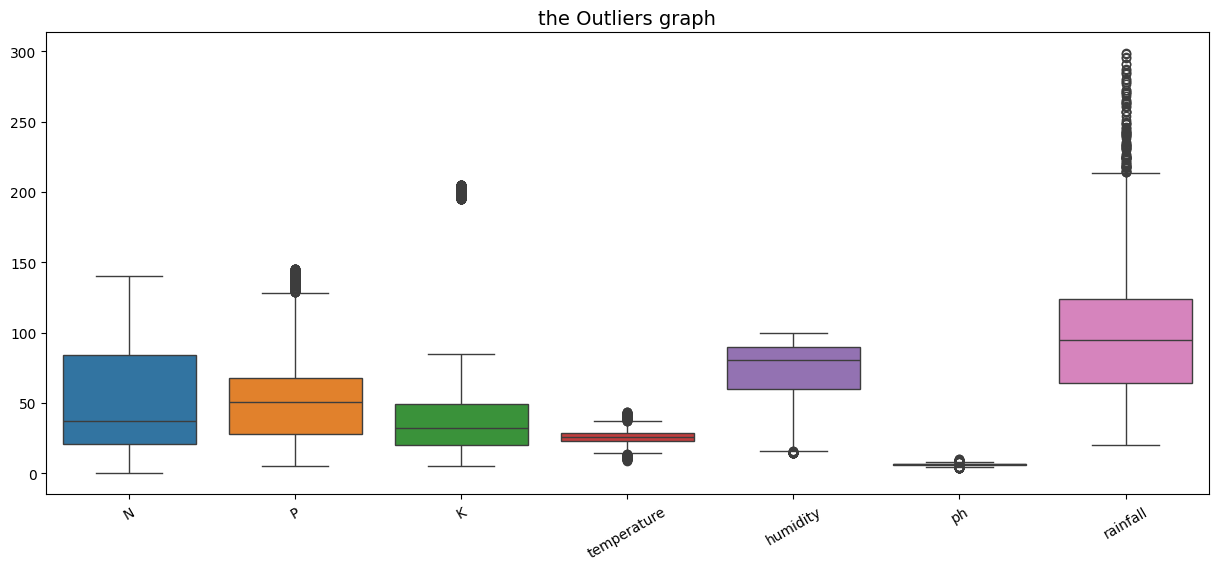

In [59]:
# Handle Outliers using IQR Method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    return info[(info[column] >= lower_bound) & (info[column] <= upper_bound)]

# Plot the results After Handling the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=info)
plt.xticks(rotation=30)
plt.title("the Outliers graph", fontsize=14)
plt.show()

In [60]:
# Identify numeric columns
numerical_cols = info.corr(numeric_only=True)

# Apply outlier removal to all numeric columns
for col in numerical_cols:
    info = cap_outliers(info,col)  

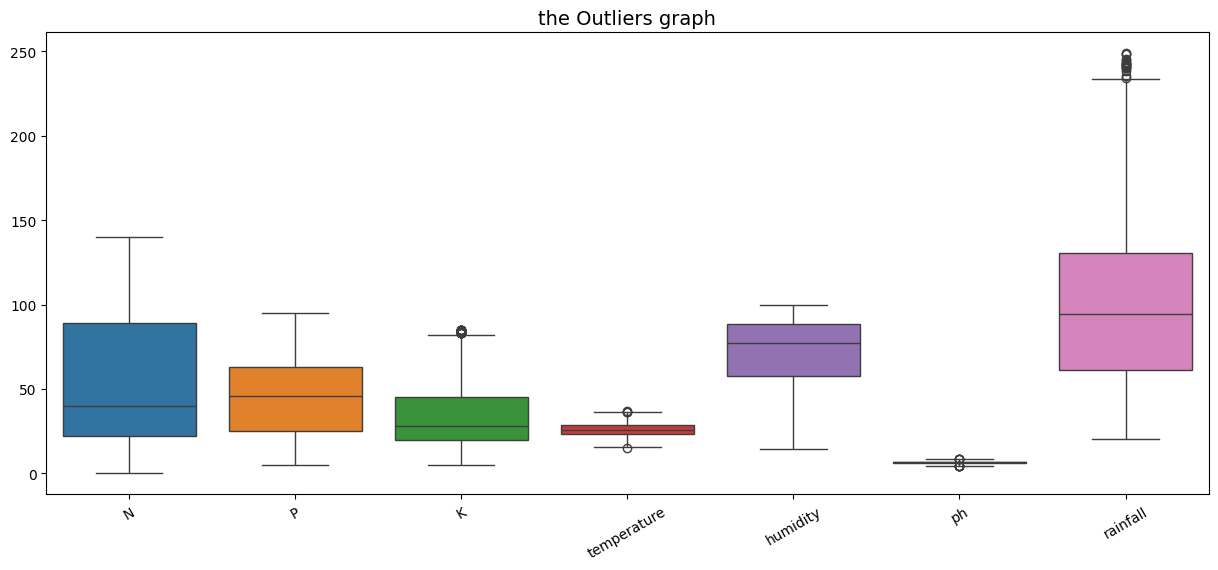

In [61]:
#Plot the results After Handling the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=info)
plt.xticks(rotation=30)
plt.title("the Outliers graph", fontsize=14)
plt.show()

In [62]:
print(info.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# VISUALIZATION STAGE

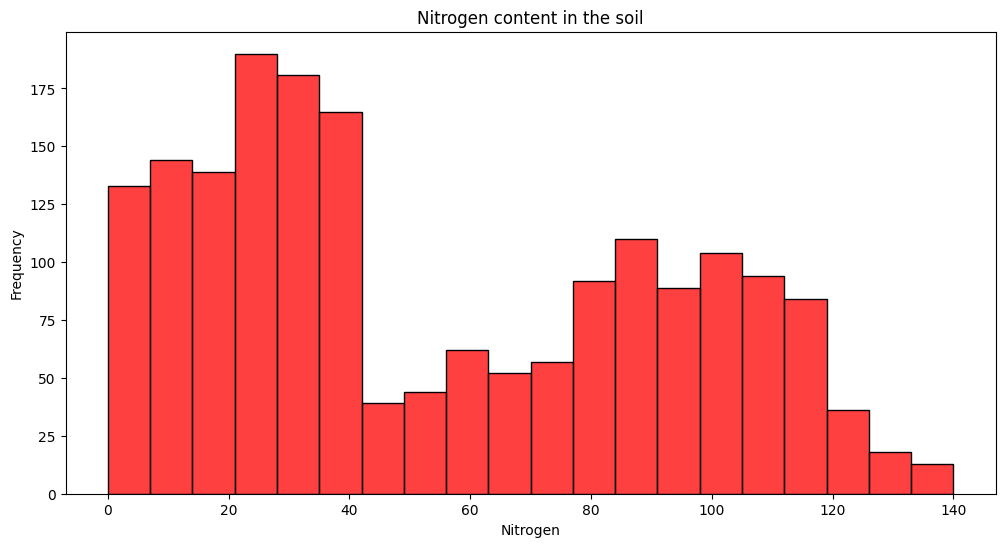

In [63]:
# Numeric data distribution
plt.figure(figsize=(12, 6))
sns.histplot(info['N'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("Nitrogen content in the soil")
plt.xlabel("Nitrogen")
plt.ylabel("Frequency")
plt.show()

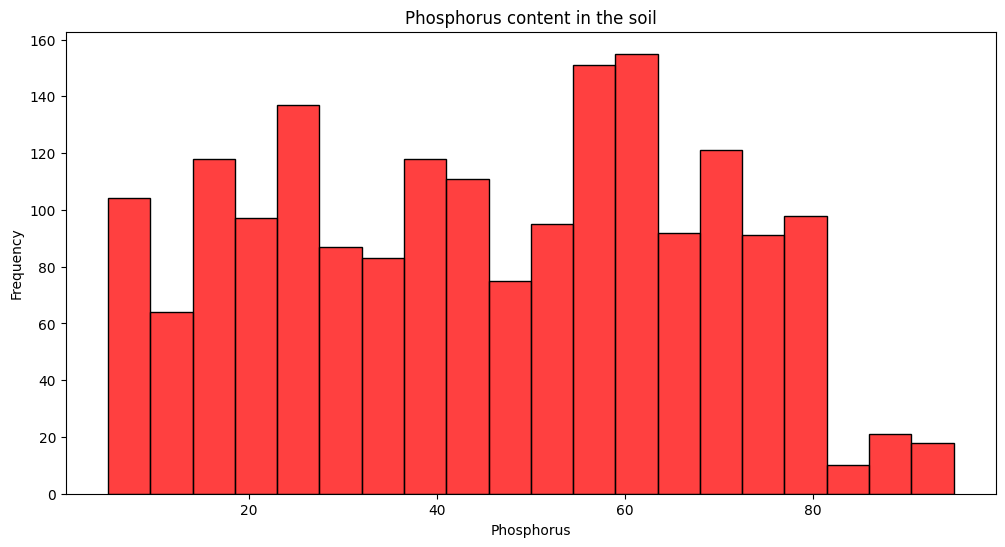

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(info['P'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("Phosphorus content in the soil")
plt.xlabel("Phosphorus")
plt.ylabel("Frequency")
plt.show()

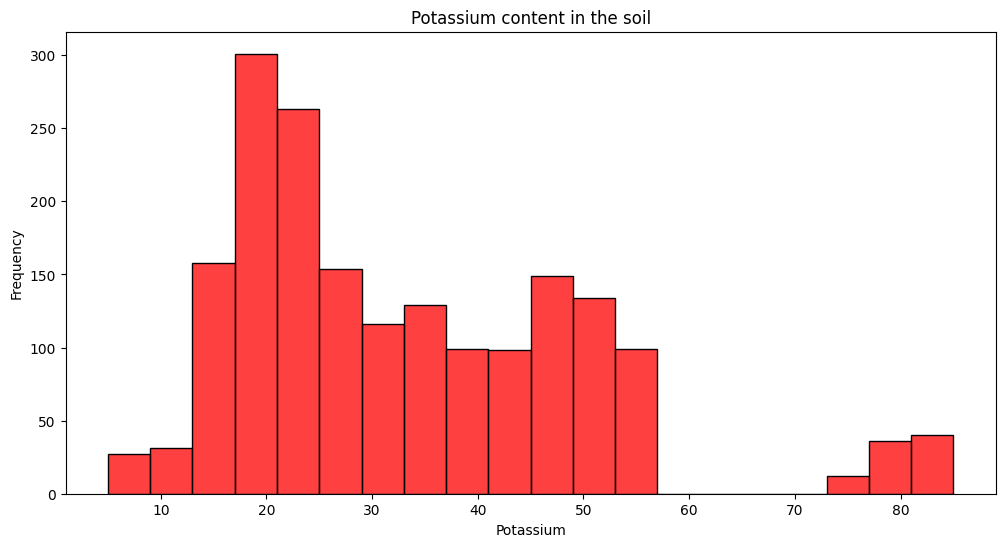

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(info['K'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("Potassium content in the soil")
plt.xlabel("Potassium")
plt.ylabel("Frequency")
plt.show()

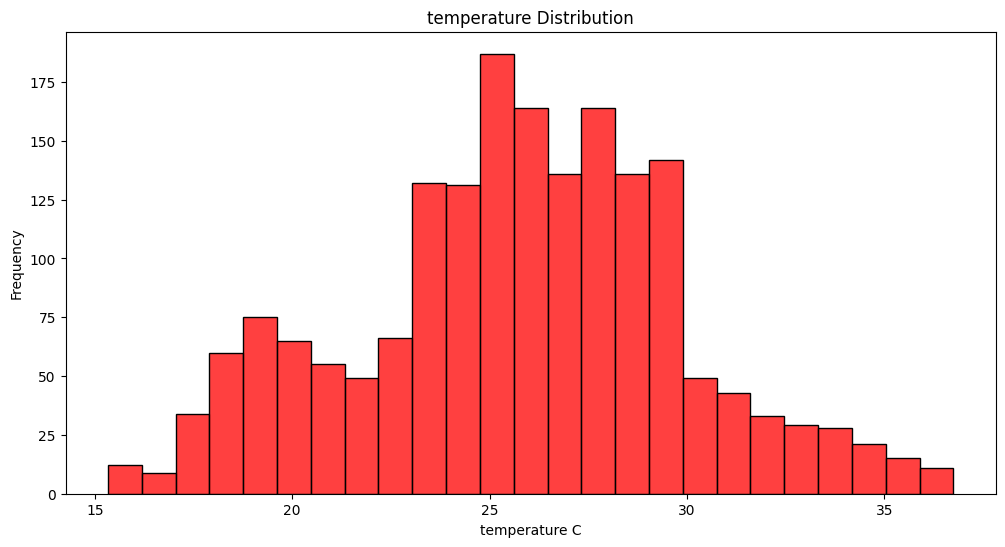

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(info['temperature'], bins=25, color='red')  # Fewer bins = wider ranges
plt.title("temperature Distribution")
plt.xlabel("temperature C")
plt.ylabel("Frequency")
plt.show()

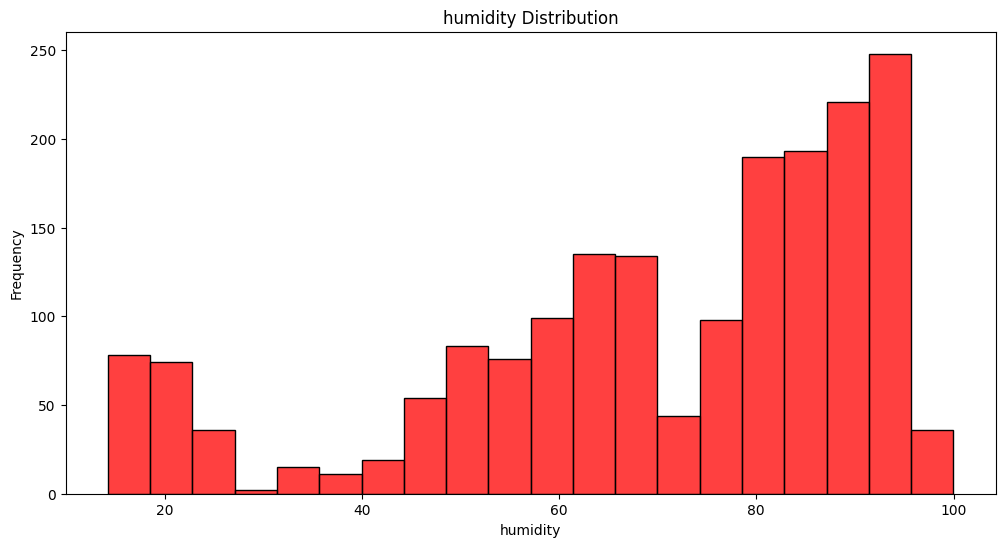

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(info['humidity'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("humidity Distribution")
plt.xlabel("humidity")
plt.ylabel("Frequency")
plt.show()

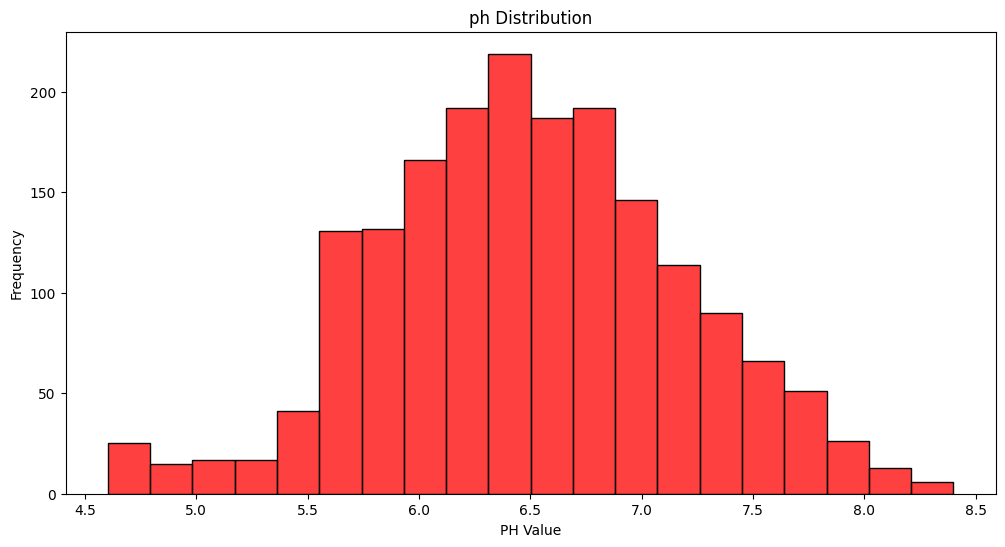

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(info['ph'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("ph Distribution")
plt.xlabel("PH Value")
plt.ylabel("Frequency")
plt.show()

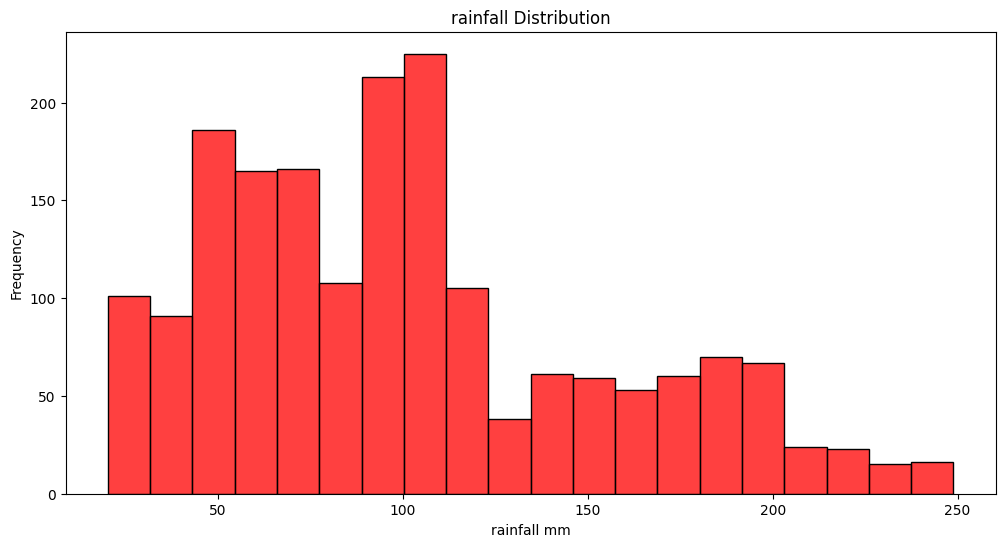

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(info['rainfall'], bins=20, color='red')  # Fewer bins = wider ranges
plt.title("rainfall Distribution")
plt.xlabel("rainfall mm")
plt.ylabel("Frequency")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4764\172581587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=info[col], palette="coolwarm")


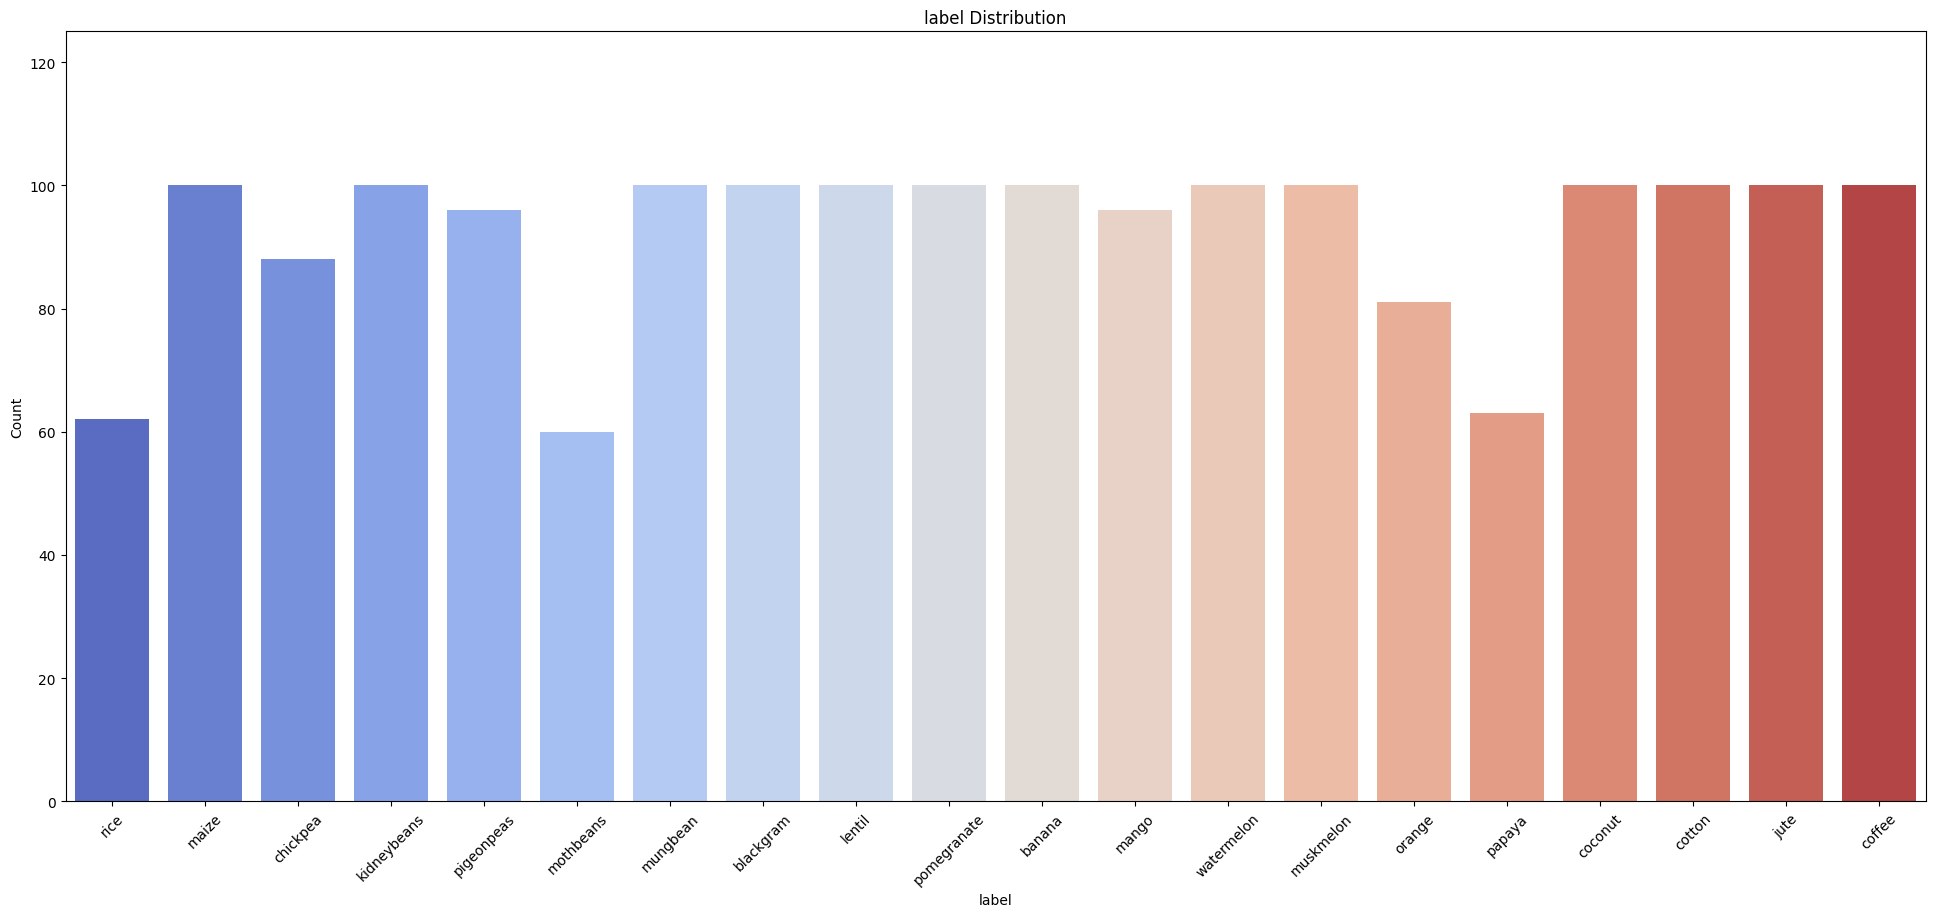

In [70]:
# Category data distribution (Target)
Numeric_data= info[['label']]
for col in Numeric_data:
    plt.figure(figsize=(24, 10))
    sns.countplot(x=info[col], palette="coolwarm")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.ylim(0,125)
    plt.show()

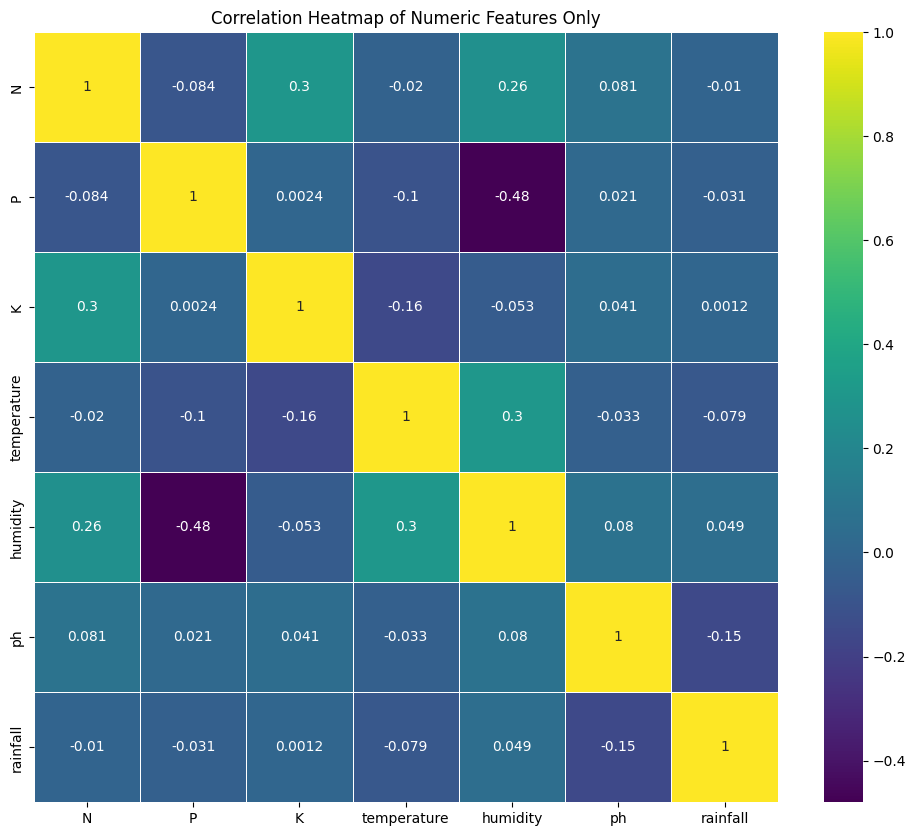

In [71]:
plt.figure(figsize=(12, 10))
sns.heatmap(info.select_dtypes(include='number').corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features Only")
plt.show()

# DATA PREPROCESSING STAGE 2

In [ ]:
# Encode Categorical Features
categorical_cols = ["label"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    info[col] = le.fit_transform(info[col].astype(str))
    label_encoders[col] = le  # Assign the LabelEncoder to the dictionary first
    joblib.dump(label_encoders[col], 'label_encoder.pkl')  # Then dump the LabelEncoder object

In [73]:
print("Label Encoding for crops") # show the coding index for each category in ["crop_disease_status"]
for idx, class_ in enumerate(le.classes_):
    print(f"{idx} -> {class_}")

Label Encoding for crops
0 -> banana
1 -> blackgram
2 -> chickpea
3 -> coconut
4 -> coffee
5 -> cotton
6 -> jute
7 -> kidneybeans
8 -> lentil
9 -> maize
10 -> mango
11 -> mothbeans
12 -> mungbean
13 -> muskmelon
14 -> orange
15 -> papaya
16 -> pigeonpeas
17 -> pomegranate
18 -> rice
19 -> watermelon


# TRAINING AND TESTING STAGE

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

--- KNN ---
Accuracy: 97.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       0.96      1.00      0.98        25
           6       0.96      0.96      0.96        27
           7       0.92      1.00      0.96        22
           8       0.94      0.89      0.91        18
           9       1.00      0.94      0.97        18
          10       1.00      1.00      1.00        16
          11       0.88      0.88      0.88        17
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        17
   

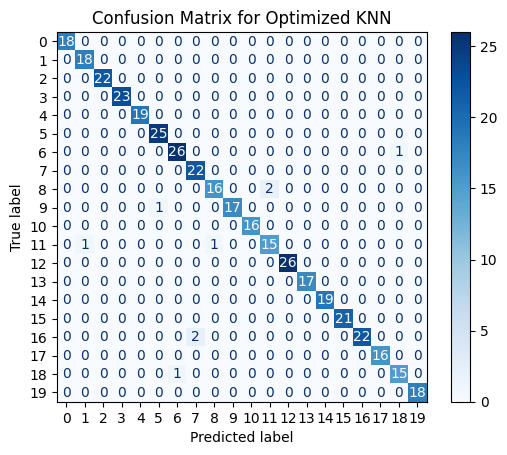

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

X = info.drop('label', axis=1)
Y = info['label']

# Scaling Features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
joblib.dump(scaler, 'scaler.pkl')

# Balancing Data with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, Y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# GridSearchCV for Optimized KNN
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best KNN Hyperparameters:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

# Evaluation
print("\n--- KNN ---")
y_pred_knn = best_knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Optimized KNN")
plt.show()

In [75]:
import joblib

# Save the best KNN model
best_knn = grid_search_knn.best_estimator_
joblib.dump(best_knn, 'best_knn_model.pkl')

['best_knn_model.pkl']

In [76]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [77]:
!pip freeze > requirements.txt